<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Forecasting of deaths from Heart Failure on medical measurement

# Lab 4. Model Development

The purpose of this lab is to master the classification of patients for machine learning models.

After completing this lab you will be able to:

1. preprocess (normalize and transform categorical data) and create DataSet
2. features selection
3. make classification of patients
4. visualize the decision tree of a classification model

## Outline

* Materials and Methods
* General Part
  * Import Libraries
  * Load the Dataset
  * Data preparation
      * Data transformation
      * Encoding and Normalization
  * Features selection
      * Chi-Squared Statistic
      * Mutual Information Statistic
      * Feature Importance
      * Correlation Matrix with Heatmap
  * Decision tree 
      * Build model
      * Visualization of decision tree
  * Classification models
      * Extra Trees Classifier
      * Logistic regression 
* Authors


----

## Materials and Methods

The data that we are going to use for this is a subset of an open source The Heart Failure Prediction Dataset. https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital.

> This dataset is publicly available for research. 
Please include this citation if you plan to use this database: 
The data contains a complete history of heart patients (so data scientists from different parts of the world can work with it). The dataset is collected from Pakistan, Faisalabad Hospital named the Institute of Cardiology

In this lesson, we will try to give answers to a set of questions that may be relevant when analyzing heart failure data:

1. What are the most useful Python libraries for classification analysis?
2. How to transform category data?
3. How to create DataSet?
4. How to do features selection?
5. How to make, fit, and visualize a classification model?

In addition, we will make the conclusions from the obtained results of our classification analysis to predict the mortality rate of patients with heart disease.

[Scikit-learn](https://scikit-learn.org/stable/) (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression, and clustering algorithms including support vector machines, random forests, gradient boosting, k-means, and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [1]:
!conda install --yes scikit-learn==0.24.2
!conda install --yes python-graphviz

## Import Libraries

Import the libraries necessary to use in this lab. We can add some aliases to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# Classificators
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')
import graphviz

Further, specify the value of the `precision` parameter equal to 2 to display two decimal signs (instead of 6 as default).

In [3]:
pd.options.display.float_format = '{:.2f}'.format

## Load the Dataset

We will use the same DataSet that we have saved in previous labs.

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0MI1EN/clean_df_new.csv')
df.head(5)

,Age Group,Marital Status,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,Smoking,Diabetes,HTN,...,Vessels num,Thal,Num,Streptokinase,SK React,Mortality,Follow up,Max heart rate-binned,Gender-male,Locality-urban
0,41-50,MARRIED,False,False,FREE,True,True,False,1,False,...,0,7,2,1,NO,0,60,Medium,0,0
1,51-60,MARRIED,False,False,FREE,True,True,False,0,False,...,0,7,2,1,NO,0,15,Medium,0,1
2,51-60,MARRIED,True,True,FREE,True,True,False,1,True,...,0,3,2,1,NO,0,6,Medium,0,0
3,51-60,MARRIED,True,True,FREE,True,True,False,1,True,...,1,7,3,1,NO,0,52,Medium,0,0
4,51-60,MARRIED,True,False,FREE,True,True,False,1,True,...,2,7,3,1,NO,0,34,Medium,0,0


In [5]:
df.shape

(368, 47)

As you can see DataSet consists of 47 columns. The target column is 'Mortality'. Also DataSet consists of 368 rows. In previous labs we investigated these columns.

<details>
<summary><b>Click to see attribute information</b></summary>

Input features (column names):

1. `Age Group` - patient age divided by groups (categorical)
2. `Marital Status` - married or single (categorical)
3. `Lifestyle` - does the patient have a healthy lifestyle (boolean)
4. `Sleep` - does the patient sleep enough?(boolean)
5. `Category` paid or free treatment (categorical)
6. `Depression` - does a patient feel depressed? (boolean)
7. `Hyperlipidemia` - an excess of lipids or fats in your blood (boolean)
8. `Smoking` - does the patient smoke? (boolean)
9. `Diabetes` - does the patient have diabetes? (binary) 
10. `HTN` - hypertension, also known as high blood pressure (boolean) 
11. `Allergies` - does the patient have allergies? (boolean)
12. `BP` - blood pressure (float, normalized) 
13. `Thrombolysis` - uses medications or a minimally invasive procedure to break up blood clots and prevent new clots from forming (binary) 
14. `BGR` - blood glucose level (int) 
15. `CPK` - creatine phosphokinase level (int)
16. `ESR` - erythrocyte sedimentation rate (int) 
17. `WBC` - white blood cells, also known as leukocytes (int) 
18. `RBC` - red blood cells, also known as erythrocytes (float) 
19. `Hemoglobin` - hemoglobin level (float) 
20. `MCH` - mean corpuscular hemoglobin or the average amount in each of red blood cells of hemoglobin (float)
21. `MCHC` - mean corpuscular hemoglobin concentration (float)
22. `PlateletCount` - count of platelets or thrombocytes (int)
23. `Lymphocyte` - share of lymphocytes in blood (float)
24. `Monocyte` -  share of monocytes in blood (float)
25. `Eosinophil` - count of eosinophils (int)
26. `Others` - other diseases, that weren't mentioned (categorical)
27. `Diagnosis` - what is the patient's diagnosis? (float)
28. `Hypersensitivity` - does the patient have hypersensitivity? (boolean)
29. `Chest pain type` - patient's chest pain stage (int)
30. `Resting BP` - resting blood pressure (float)
31. `Serum cholesterol` - amount of total cholesterol in their blood (float)
32. `FBS` - fasting blood sugar > 120 mg/dl (binary)
33. `Resting electrocardiographic` - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy) (int)
34. `Max heart rate` - patient's maximum heart rate achieved (int)
35. `Angina` - does the patient have exercise induced angina (binary)
36. `ST depression` - ST depression induced by exercise relative to rest (float)
37. `Slope` - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) (int)
38. `Vessels num` - number of major vessels (0-3) colored by flourosopy (int)
39. `Thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect (int)
40. `Num` -  diagnosis of heart disease (angiographic disease status) (int)
41. `Streptokinase` - used to dissolve blood clots that have formed in the blood vessels. Does the patient take it? (binary)
42. `SK React` - what is the reaction from streptokinase (categorical)
43. `Follow up` - number of patient's visiting time (int)
44. `Max heart rate-binned` - patient's maximum heart rate achieved - binned (from Lab2) (categorical)
45. `Gender-male` - is the patient male (from Lab2)? (binary)
46. `Locality-urban` - is the patient's locality urban (from Lab2)? (binary)

Output feature (desired target):

47. `Mortality` - did the patient die of heart failure? (binary)
</details>

Our goal is to create a model for predicting mortality caused by Heart Failure. To do this we must analyze and prepare data for such type of model.

## Data preparation

### Data transformation

First of all we should investigate how pandas recognized types of features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age Group                     368 non-null    object 
 1   Marital Status                368 non-null    object 
 2   Lifestyle                     368 non-null    bool   
 3   Sleep                         368 non-null    bool   
 4   Category                      368 non-null    object 
 5   Depression                    368 non-null    bool   
 6   Hyperlipidemia                368 non-null    bool   
 7   Smoking                       368 non-null    bool   
 8   Diabetes                      368 non-null    int64  
 9   HTN                           368 non-null    bool   
 10  Allergies                     368 non-null    bool   
 11  BP                            368 non-null    float64
 12  Thrombolysis                  368 non-null    int64  
 13  BGR  

As you can see all categorical features were recognized like object. We must change their type to "categorical". 

In [7]:
col_cat = list(df.select_dtypes(include=['object']).columns)
col_cat

['Age Group',
 'Marital Status',
 'Category',
 'Others',
 'Diagnosis',
 'SK React',
 'Max heart rate-binned']

Let's look at the dataset size.

In [8]:
df.loc[:, col_cat] = df[col_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age Group                     368 non-null    category
 1   Marital Status                368 non-null    category
 2   Lifestyle                     368 non-null    bool    
 3   Sleep                         368 non-null    bool    
 4   Category                      368 non-null    category
 5   Depression                    368 non-null    bool    
 6   Hyperlipidemia                368 non-null    bool    
 7   Smoking                       368 non-null    bool    
 8   Diabetes                      368 non-null    int64   
 9   HTN                           368 non-null    bool    
 10  Allergies                     368 non-null    bool    
 11  BP                            368 non-null    float64 
 12  Thrombolysis                  368 non-null    int6

To see the unique values of the exact feature (column) we can use:

In [9]:
df['Age Group'].unique()

['41-50', '51-60', '61-70', '21-30', '31-40']
Categories (5, object): ['21-30', '31-40', '41-50', '51-60', '61-70']

As was signed earlier the dataset contains 368 objects (rows), for each of which 47 features are set (columns), including 1 target feature (y). 7 features are categorical. These data types of values cannot be used for classification. We must transform it to int or float.
To do this we can use **[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)** and **[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)**. These functions can encode categorical features as an integer array.

First of all we separate DataSet on input and output(target) DataSets

In [10]:
X = df.drop(['Mortality'], axis=1)  #input columns
y = df['Mortality']   #target column

### Encoding and Normalization

Let's see how many unique values our target column has.

In [11]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

We have 288 0 values and 80 1 values, which is acceptable for predicting our target column.

Then create a list of categorical fields and transform their values into int arrays:

In [12]:
col_cat = list(X.select_dtypes(include=['category']).columns)
oe = OrdinalEncoder()
oe.fit(X[col_cat])
X_cat_enc = oe.transform(X[col_cat])

In [13]:
X_cat_enc

array([[ 2.,  0.,  0., ..., 22.,  4.,  2.],
       [ 3.,  0.,  0., ...,  6.,  4.,  2.],
       [ 3.,  0.,  0., ...,  8.,  4.,  2.],
       ...,
       [ 3.,  0.,  0., ...,  6.,  1.,  2.],
       [ 3.,  0.,  0., ...,  7.,  1.,  2.],
       [ 2.,  0.,  0., ...,  4.,  0.,  0.]])

Then we must transform arrays back into DataFrame:

In [14]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat

Numerical fields can have a different scale and can consist of negative values. These will lead to round mistakes and exceptions for some AI methods. To avoid it these features must be normalized.

Let's create a list of numerical fields and normalize it using by **[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)**

In [15]:
col_num = list(X.select_dtypes(include=['float', 'int', 'bool']).columns)
scaler = MinMaxScaler(feature_range=(0, 1))
X_num_enc = scaler.fit_transform(X[col_num])

In [16]:
X_num_enc

array([[0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.23728814, 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.08474576, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.52542373, 1.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.52542373, 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.23728814, 1.        ,
        0.        ]])

Like in the previous case transform back obtained arrays into DataFrame

In [17]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num
X_num_enc

,Lifestyle,Sleep,Depression,Hyperlipidemia,Smoking,Diabetes,HTN,Allergies,BP,Thrombolysis,...,Angina,ST depression,Slope,Vessels num,Thal,Num,Streptokinase,Follow up,Gender-male,Locality-urban
0,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.18,0.00,...,1.00,0.48,0.50,0.00,1.00,0.33,1.00,1.00,0.00,0.00
1,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.09,0.00,...,1.00,0.19,0.50,0.00,1.00,0.33,1.00,0.24,0.00,1.00
2,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.18,0.00,...,1.00,0.55,0.50,0.00,0.00,0.33,1.00,0.08,0.00,0.00
3,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.73,0.00,...,1.00,0.32,0.50,0.33,1.00,0.67,1.00,0.86,0.00,0.00
4,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.09,0.00,...,1.00,0.65,1.00,0.67,1.00,0.67,1.00,0.56,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.37,1.00,...,0.00,0.08,0.50,0.00,1.00,0.67,0.00,1.00,1.00,1.00
364,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.28,0.00,...,0.00,0.32,0.50,1.00,1.00,0.67,1.00,0.59,1.00,0.00
365,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.46,0.00,...,0.00,0.13,0.00,1.00,0.00,0.00,1.00,0.53,1.00,1.00
366,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.37,0.00,...,0.00,0.42,0.50,0.00,1.00,1.00,1.00,0.53,1.00,1.00


Then we should concatenate these DataFrames in one input DataFrame

In [18]:
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
x_enc

,Age Group,Marital Status,Category,Others,Diagnosis,SK React,Max heart rate-binned,Lifestyle,Sleep,Depression,...,Angina,ST depression,Slope,Vessels num,Thal,Num,Streptokinase,Follow up,Gender-male,Locality-urban
0,2.00,0.00,0.00,16.00,22.00,4.00,2.00,0.00,0.00,1.00,...,1.00,0.48,0.50,0.00,1.00,0.33,1.00,1.00,0.00,0.00
1,3.00,0.00,0.00,16.00,6.00,4.00,2.00,0.00,0.00,1.00,...,1.00,0.19,0.50,0.00,1.00,0.33,1.00,0.24,0.00,1.00
2,3.00,0.00,0.00,11.00,8.00,4.00,2.00,1.00,1.00,1.00,...,1.00,0.55,0.50,0.00,0.00,0.33,1.00,0.08,0.00,0.00
3,3.00,0.00,0.00,5.00,25.00,4.00,2.00,1.00,1.00,1.00,...,1.00,0.32,0.50,0.33,1.00,0.67,1.00,0.86,0.00,0.00
4,3.00,0.00,0.00,16.00,6.00,4.00,2.00,1.00,0.00,1.00,...,1.00,0.65,1.00,0.67,1.00,0.67,1.00,0.56,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3.00,0.00,0.00,4.00,36.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.08,0.50,0.00,1.00,0.67,0.00,1.00,1.00,1.00
364,3.00,0.00,0.00,16.00,0.00,6.00,2.00,1.00,0.00,1.00,...,0.00,0.32,0.50,1.00,1.00,0.67,1.00,0.59,1.00,0.00
365,3.00,0.00,0.00,15.00,6.00,1.00,2.00,0.00,0.00,1.00,...,0.00,0.13,0.00,1.00,0.00,0.00,1.00,0.53,1.00,1.00
366,3.00,0.00,0.00,16.00,7.00,1.00,2.00,0.00,0.00,1.00,...,0.00,0.42,0.50,0.00,1.00,1.00,1.00,0.53,1.00,1.00


Our target column is already normalized, so we don't need to encode it.<br>

## Features selection

As was signed before input fields consist of 46 features. Of course, some of them are more significant for classification.

There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

They are:

* Chi-Squared Statistic.
* Mutual Information Statistic.

Let’s take a closer look at each in turn.

To do this we can use **[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)**

### Chi-Squared Statistic

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

You can learn more about this statistical test in the tutorial:

[A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

The scikit-learn machine library provides an implementation of the chi-squared test in the **[chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2)** function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

For example, we can define the SelectKBest class to use the chi2() function and select all (or most significant) features.

Apply SelectKBest class to extract the top 10 best features

In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

Concat two dataframes for better visualization 

In [20]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs  Score
12    Thrombolysis  19.99
3            Sleep  12.05
2        Lifestyle   5.64
44     Gender-male   5.25
13             BGR   5.18
11              BP   4.63
39             Num   3.38
16             WBC   3.33
5       Depression   2.41
6   Hyperlipidemia   1.99


### Mutual Information Statistic

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

[You can learn more about mutual information in the following tutorial.](https://machinelearningmastery.com/information-gain-and-mutual-information)

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the **[mutual_info_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)** function.

Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

In [21]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                           Specs  Score
32  Resting electrocardiographic   0.39
35                 ST depression   0.28
18                    Hemoglobin   0.19
17                           RBC   0.18
20                          MCHC   0.16
25                        Others   0.16
31                           FBS   0.14
0                      Age Group   0.14
43         Max heart rate-binned   0.14
23                      Monocyte   0.14


As you can see these 2 functions select different significant features.

### Feature Importance

You can get the feature importance of each feature of your DataFrame by using the feature importance property of the exact classification model. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant the feature is to your output variable. For example, 
feature importance is an inbuilt class that comes with **[Tree Based Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)**, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

Let's create and fit the model:

In [22]:
model = ExtraTreesClassifier()
model.fit(x_enc, y)

ExtraTreesClassifier()

Use inbuilt class `feature_importances` of tree based classifiers

In [23]:
print(model.feature_importances_)

[0.07169748 0.00040171 0.01206535 0.01778265 0.01484915 0.01429818
 0.02991038 0.01458132 0.01394214 0.00384481 0.00476815 0.01643463
 0.05654882 0.01817389 0.00261686 0.0232691  0.00084293 0.0171091
 0.01663227 0.01684345 0.02068348 0.01948406 0.02555602 0.01508219
 0.01379731 0.01891441 0.02126036 0.01831163 0.02035203 0.00410072
 0.01342207 0.03554987 0.04332096 0.01878102 0.0255553  0.03538243
 0.03498912 0.03510936 0.02109251 0.06407691 0.02342365 0.0319821
 0.00068829 0.03053552 0.02313041 0.01880588]


Let's transform it into a `Series` and plot a graph of features' importance for better visualization

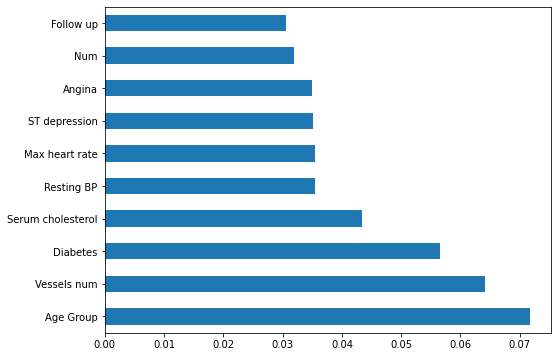

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

You can see that for Extra Tree Classifier impotance of features are different than in previous cases. It means that there are not exact rules for features selection. And their impotance strictly depedence on model.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h1>Question 1:</h1>
    <p>Plot graph of 5 least important features</p>
</div>

In [25]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
feat_importances.nsmallest(5).plot(kind='barh')
plt.show()

```

</details>

### Correlation Matrix with Heatmap

Correlation states how the features are related to each other. Correlation can be positive (an increase in one value of a feature increases the value of the other variable) or negative (an increase in one value of a feature decreases the value of the other variable) Heatmap makes it easy to identify which features are most related to the other variable, we will plot heatmap of correlated features using the seaborn library.

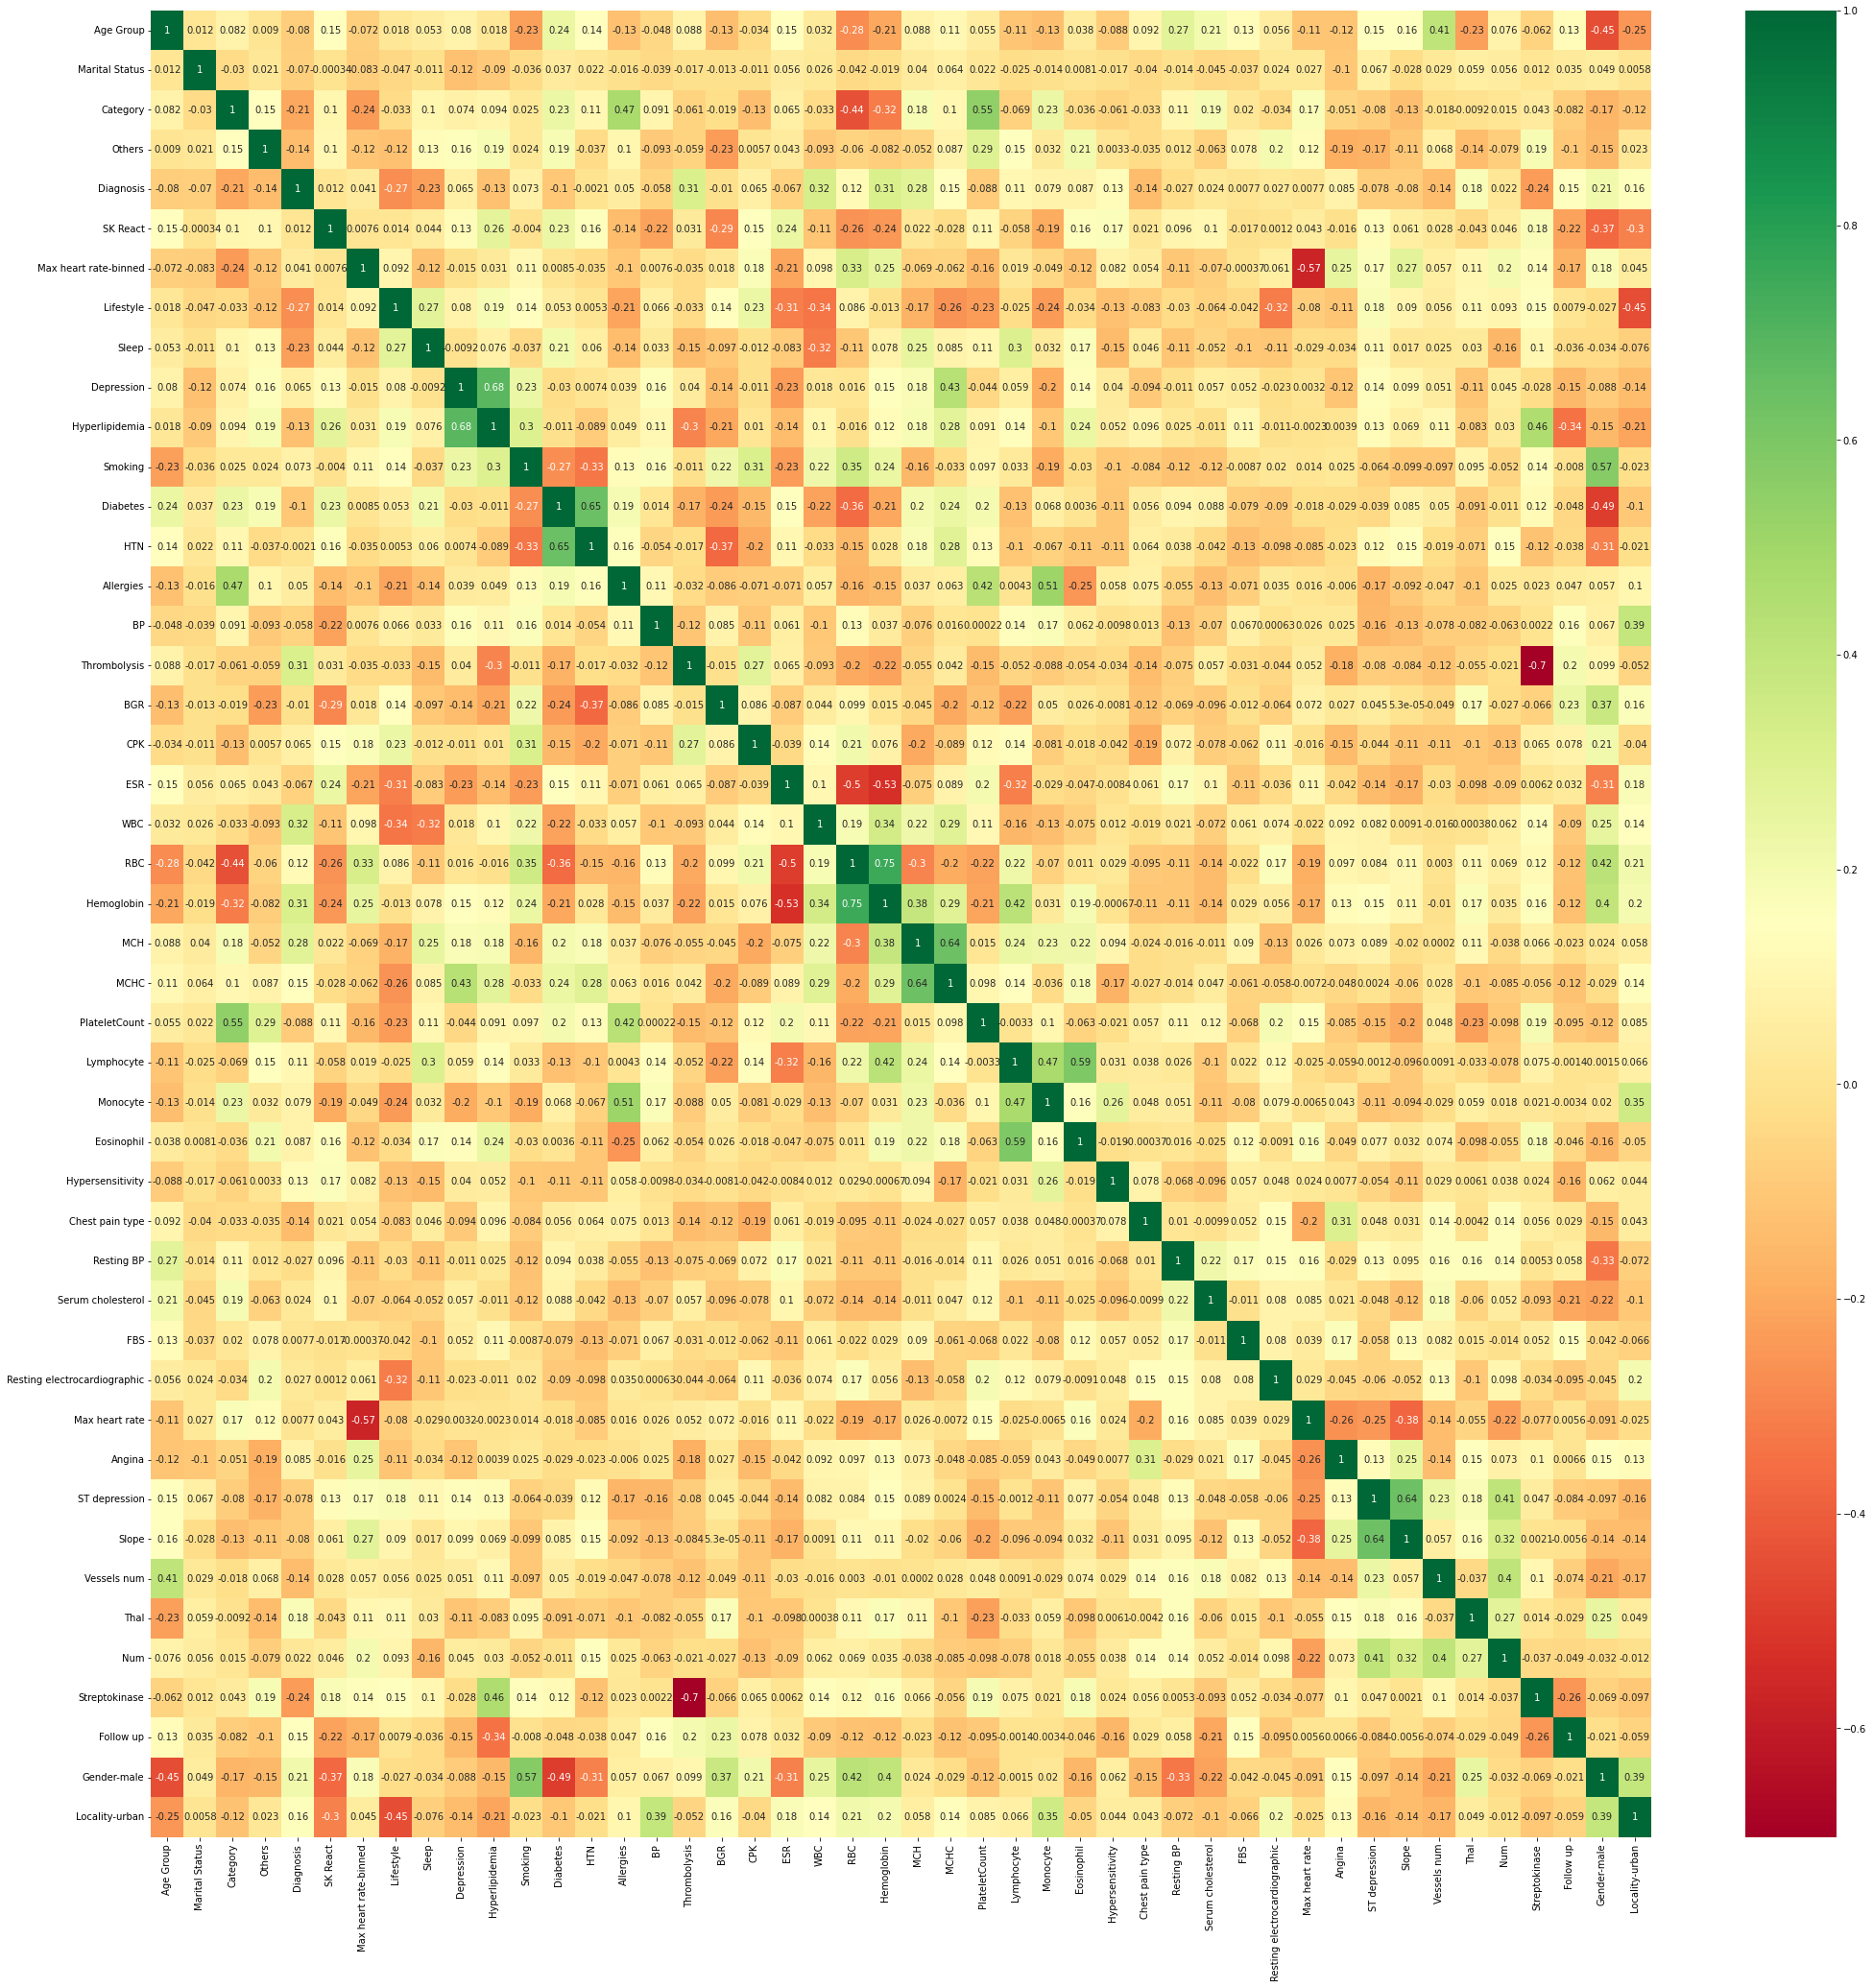

In [26]:
corrmat = x_enc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(35,35))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We have already removed strictly correlated columns in previous lab, thus we can use all these features.

## Classification models

## Decision tree

### Build model

As shown, the previous methods have high accuracy. However, the biggest drawback is the inability to visualize or justify the decision.

Decision trees are a popular supervised learning method for a variety of reasons. The benefits of decision trees include that they can be used for both regression and classification, they don’t require feature scaling, and they are relatively easy to interpret as you can visualize decision trees. This is not only a powerful way to understand your model, but also to communicate how your model works. Consequently, it would help to know how to make a visualization based on your model.

A **[Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)** is a supervised algorithm used in machine learning. It is using a binary tree graph (each node has two children) to assign for each data sample a target value. The target values are presented in the tree leaves. To reach the leaf, the sample is propagated through nodes, starting at the root node. In each node, a decision is made, as to which descendant node it should go. A decision is made based on the selected sample’s features. Decision Tree learning is a process of finding the optimal rules in each internal tree node according to the selected metric.

This method allows also us to calculate the features' importance. Let's calculate them. Choice the best 10 of them. Refit the model and visualize the decision tree.

In [27]:
model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(x_enc, y)
yhat = model_dec_tree.predict(x_enc)
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


Create a user function that will calculate the accuracy of the defined classification model:

In [28]:
def model_ac(x, y, model):
    model.fit(x, y)
    yhat = model.predict(x)
    accuracy = accuracy_score(y, yhat)
    return accuracy

Now let's create a user function that will calculate the features' importance of the defined classification model. And let's create a variable, that contains features sorted by importance in descending order.

In [29]:
def model_imp(x, y, model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    return feat_importances.sort_values(ascending=False)
imp = model_imp(x_enc, y, model_dec_tree)
print(imp)

Gender-male                    0.14
Age Group                      0.14
Diabetes                       0.14
Hemoglobin                     0.14
Serum cholesterol              0.12
Max heart rate                 0.11
Vessels num                    0.06
RBC                            0.05
ST depression                  0.03
Diagnosis                      0.03
Depression                     0.02
Lymphocyte                     0.01
CPK                            0.01
PlateletCount                  0.00
Slope                          0.00
Monocyte                       0.00
Thal                           0.00
Resting electrocardiographic   0.00
FBS                            0.00
Num                            0.00
Resting BP                     0.00
Chest pain type                0.00
Streptokinase                  0.00
Follow up                      0.00
Hypersensitivity               0.00
Eosinophil                     0.00
Angina                         0.00
MCH                         

Plot graph of feature importances for better visualization

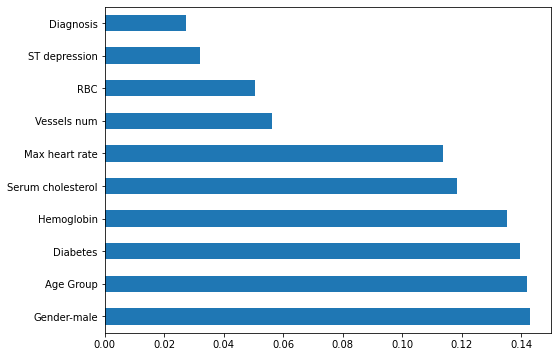

In [30]:
imp.nlargest(10).plot(kind='barh')
plt.show()

Build a plot that shows the accuracy of the defined model dependence on the number of input features.

Input fields:  1 Accuracy: 78.26
Input fields:  2 Accuracy: 81.25
Input fields:  3 Accuracy: 85.87
Input fields:  4 Accuracy: 93.75
Input fields:  5 Accuracy: 100.00
Input fields:  6 Accuracy: 100.00
Input fields:  7 Accuracy: 100.00
Input fields:  8 Accuracy: 100.00
Input fields:  9 Accuracy: 100.00
Input fields:  10 Accuracy: 100.00
Input fields:  11 Accuracy: 100.00
Input fields:  12 Accuracy: 100.00
Input fields:  13 Accuracy: 100.00
Input fields:  14 Accuracy: 100.00
Input fields:  15 Accuracy: 100.00
Input fields:  16 Accuracy: 100.00
Input fields:  17 Accuracy: 100.00
Input fields:  18 Accuracy: 100.00
Input fields:  19 Accuracy: 100.00
Input fields:  20 Accuracy: 100.00
Input fields:  21 Accuracy: 100.00
Input fields:  22 Accuracy: 100.00
Input fields:  23 Accuracy: 100.00
Input fields:  24 Accuracy: 100.00
Input fields:  25 Accuracy: 100.00
Input fields:  26 Accuracy: 100.00
Input fields:  27 Accuracy: 100.00
Input fields:  28 Accuracy: 100.00
Input fields:  29 Accuracy: 100.0

<AxesSubplot: >

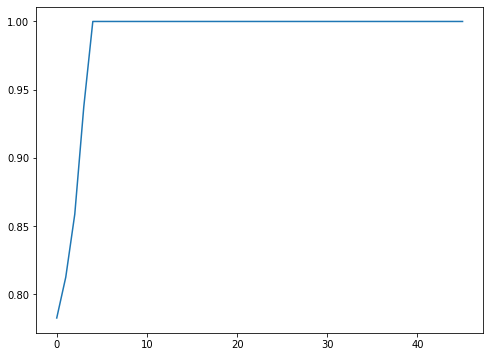

In [31]:
col = []
ac = []
for c in imp.index:
    col.append(c)
    ac.append(model_ac(x_enc[col], y, model_dec_tree))
    print('Input fields: ', len(col), 'Accuracy: %.2f' % (ac[-1]*100))
ac = pd.Series(ac)
ac.plot()

We can see that 5 features are enough to make 100% accuracy. So let's create a list of these 5 features in order to use them for our next classification models.

In [32]:
col = imp.nlargest(5).index
col

Index(['Gender-male', 'Age Group', 'Diabetes', 'Hemoglobin',
       'Serum cholesterol'],
      dtype='object')

Let's refit the model on most important features

In [33]:
X_most_imp = x_enc[col]
model_dec_tree.fit(X_most_imp, y)
yhat = model_dec_tree.predict(X_most_imp)
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


### Extra Trees Classifier

Let's create and fit ExtraTreesClassifier on the most important features and calculate the accuracy of classification:

In [34]:
model = ExtraTreesClassifier()
model.fit(X_most_imp, y)

ExtraTreesClassifier()

Evaluate the model to obtain predictions

In [35]:
yhat = model.predict(X_most_imp)
print(yhat)

[0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]


Evaluate the accuracy: 

In [36]:
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h1>Question 2:</h1>
    <p>Create the variable, that contains features sorted by importance in descending order for the Extra Tree model (using 5 most important features)</p>
</div>

In [37]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
imp = model_imp(X_most_imp, y, model)
print(imp)

```

</details>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h1>Question 3:</h1>
    <p>Build a plot that shows the accuracy of the Extra Tree model dependence on the numbers of input features (using 5 most important features)</p>
</div>

In [38]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
col = []
ac = []
for c in imp.index:
    col.append(c)
    ac.append(model_ac(X_most_imp[col], y, model))
    print('Input fields: ', len(col), 'Accuracy: %.2f' % (ac[-1]*100))
ac = pd.Series(ac)
ac.plot()

```

</details>

### Logistic regression 

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use?

A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

**[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model. We will use this model in an absolutely similar way to the previous one.

In [39]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_most_imp, y)
yhat = model.predict(X_most_imp)
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 79.62


As we can see, the accuracy of the Logistic Regression model is lower (about 80%).

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h1>Question 4:</h1>
    <p>Calculate the accuracy of the Logistic Regression model using all features.</p>
</div>

In [40]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python
model = LogisticRegression(solver='lbfgs')
model.fit(x_enc, y)
yhat = model.predict(x_enc)
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.2f' % (accuracy*100))

```

</details>

### Visualization of the decision tree

Let's visualize the decision tree.
There are some ways to do it. 

### _Text visualization_

In [41]:
text_representation = tree.export_text(model_dec_tree)
print(text_representation)

|--- feature_1 <= 2.50
|   |--- feature_3 <= 0.79
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_4 <= 0.16
|   |   |   |   |--- feature_4 <= 0.13
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.13
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.16
|   |   |   |   |--- feature_4 <= 0.63
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.63
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_3 <= 0.46
|   |   |   |   |--- feature_3 <= 0.24
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  0.24
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.46
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.79
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 1
|--- feature_1 >  2.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_4 <= 0.63
|   |   |   |--- feature_4 <= 0.36
|   |   |   |   |--- cl

You can save it into the file:

In [42]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### _Plot tree_

You can plot a tree using two different ways:

**[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)** (slow render - this can take some time): 


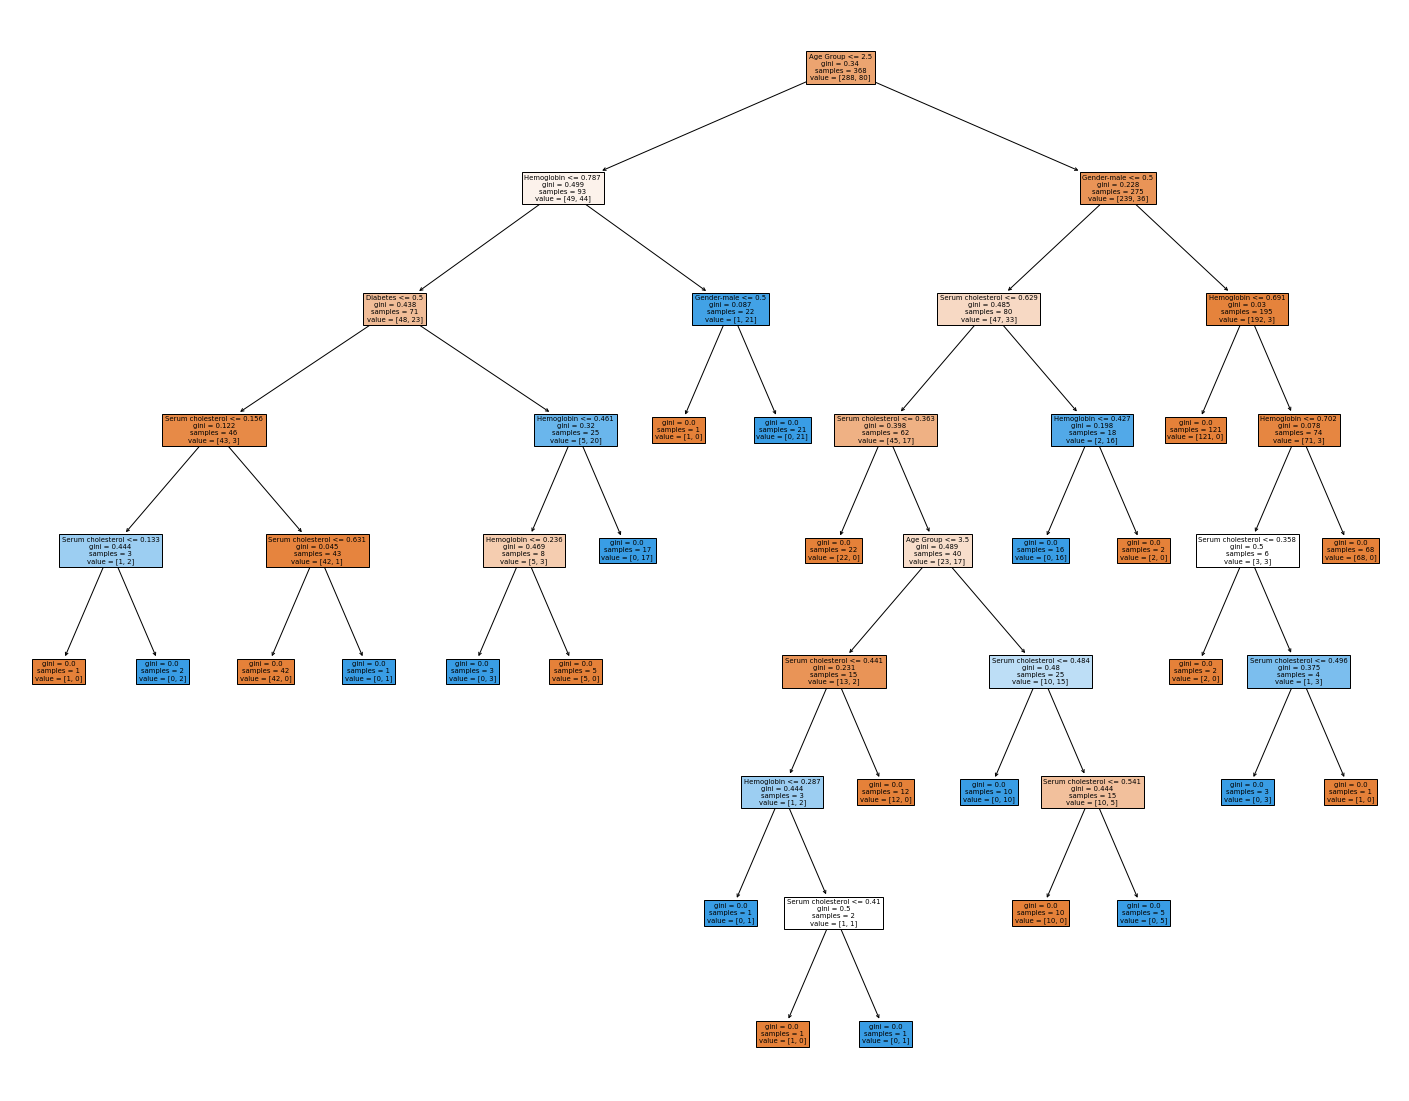

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dec_tree,
               feature_names = col, 
               filled = True)

This tree is aimed to help the doctor make a decision about whether our patient is supposed to die of heart failure. But it's problematic to make a decision because data is normalized here, so we need to fix that. Let's create a model, where the data isn't normalized. 

In [44]:
model_real = DecisionTreeClassifier()
X_most_imp_real = df[X_most_imp.columns]

oe = OrdinalEncoder()
oe.fit(X_most_imp_real[['Age Group']])
X_most_imp_real['Age Group'] = oe.transform(X_most_imp_real[['Age Group']]) 

model_real.fit(X_most_imp_real, y)
yhat = model_real.predict(X_most_imp_real)
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


As you can see, we also use `OrdinalEncoder()` to encode categorical columns ('Age Group' in this case) in order to provide correct code execution. We can't make a DecisionTree model using categorical values. So after that, we can fit the model and predict our target column.

Let's plot what we've got

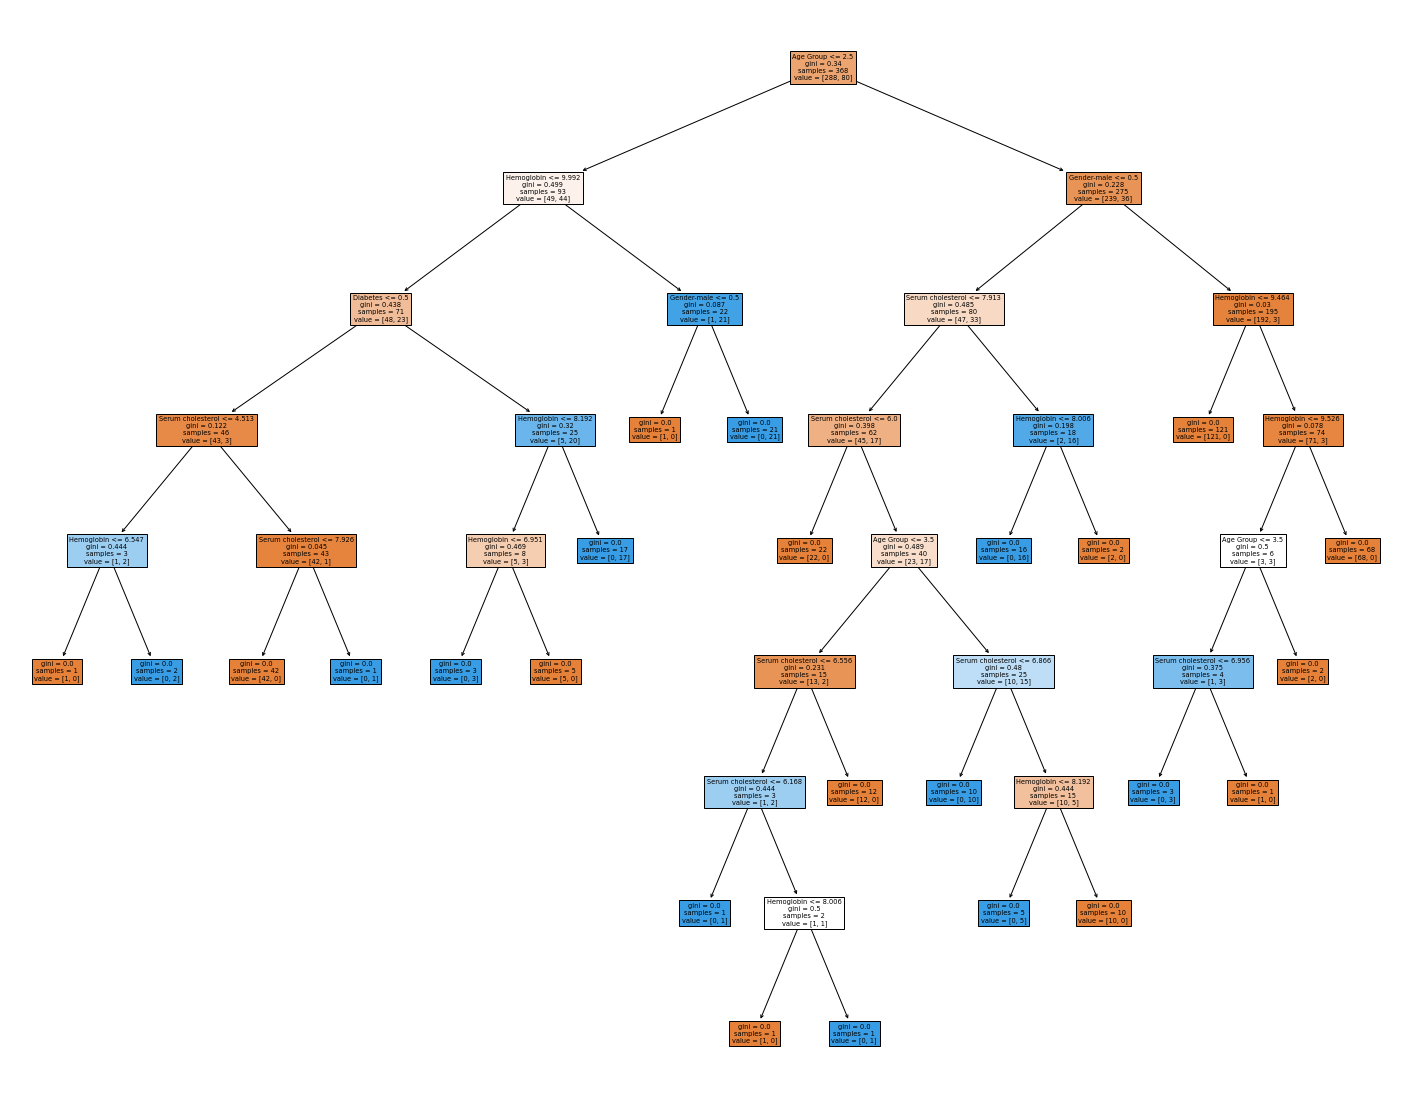

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_real,
               feature_names = col, 
               filled = True)

Save the picture

In [46]:
fig.savefig('decision_tree.png')

Now we can see our decision tree is much more understandable. But how can we read column 'Age Group'? In order to deal with this problem, we need to compare numerical values with categorical values. We have 5 categories and 5 numerical values: <br>
'21-30' - 0, <br>
'31-40' - 1, <br>
'41-50' - 2, <br>
'51-60' - 3, <br>
'61-70' - 4 <br>
So 'Age Group <= 2.5' means that first three categories are correct ('21-30', '31-40', '41-50')<br>
<h3>How to make a decision</h3>
<p>If the expression is true, we move to the left, if it's false - to the right. For example, we have a patient and data about him:
    'Age Group' - '51-60', <br>
    'Serum cholesterol' - 8.0, <br>
    'Gender-male' - 0, <br>
    'Hemoglobin' - 8.0, <br>
    'Diabetes' - 1 <br>
Age Group <= 2.5' - false; Gender-male <= 0.5 - true; Serum cholesterol <= 7.913 - false; Hemoglobin <= 8.006 - true. The result is true, our patient will die of heart failure.</p>
<p>Also, as another example, we can take real data from our DataSet. Let's take a patient with index 0 and check whether the result will be the same.
    'Age Group' - '41-50', <br>
    'Serum cholesterol' - 10-58, <br>
    'Gender-male' - 0, <br>
    'Hemoglobin' - 7.2, <br>
    'Diabetes' - 1 <br>
Age Group <= 2.5' - true; Hemoglobin <= 9.992 - true; Diabetes <= 0.5 - false; Hemoglobin <= 8.192 - true; Hemoglobin <= 6.951 - false.  The result is false, this patient won't die of heart failure. Moreover, in the DataSet 'Mortality' of the patient with a 0 index is 0. So, the result is successful and we learned how to predict the mortality of patients using a decision tree. </p>

Or you can use the **[python-graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)** library. This is a faster function

In [47]:
dot_data = tree.export_graphviz(model_real,
               feature_names = col,
                                filled=True)

After creation you can draw the graph

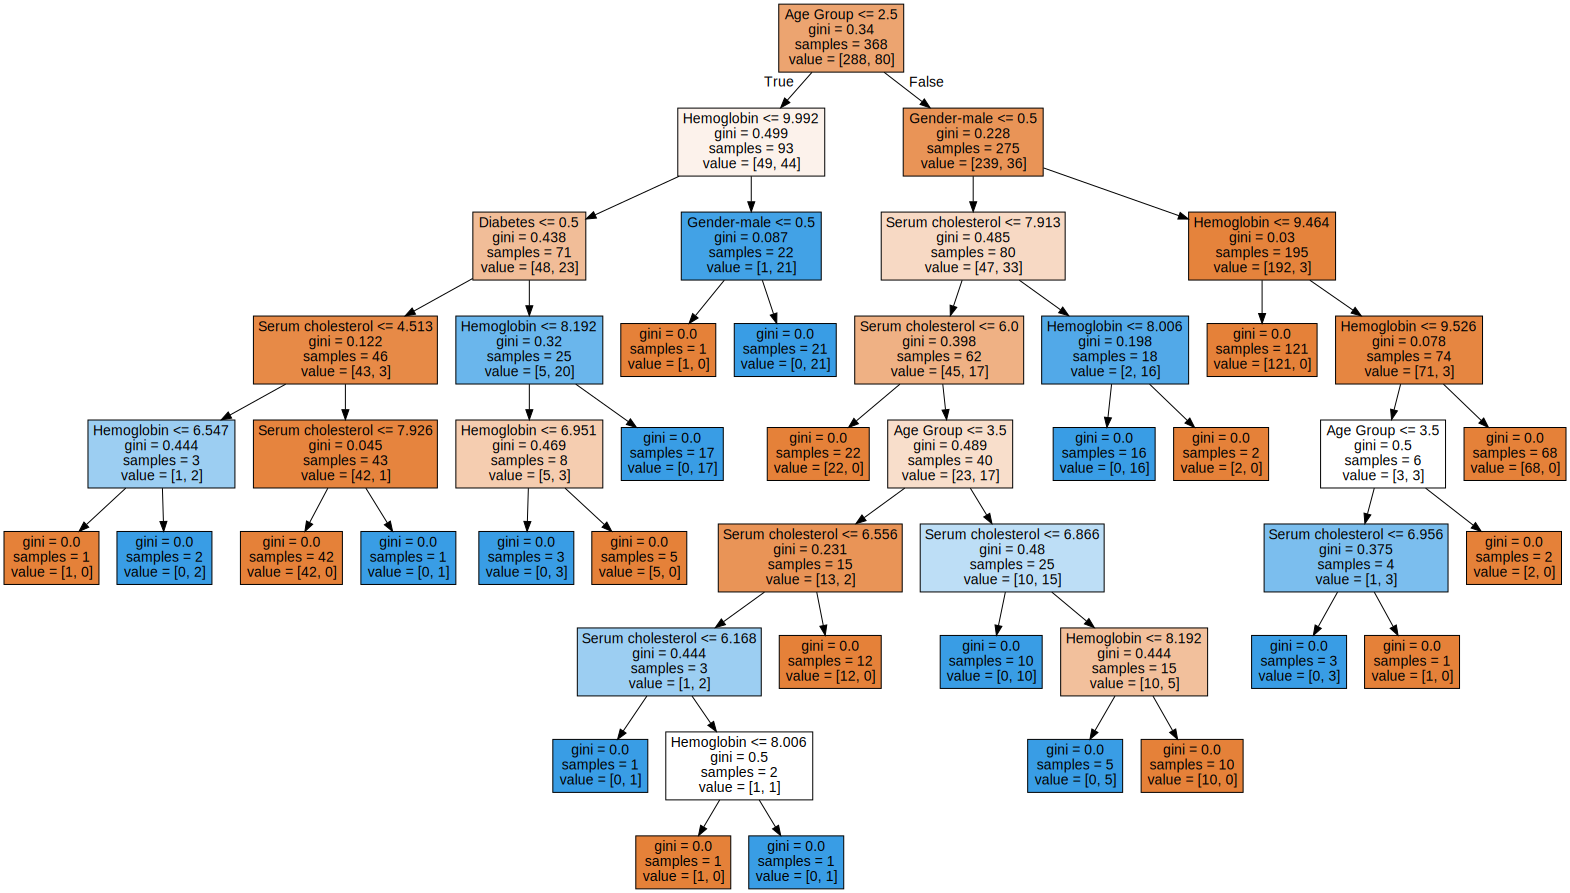

In [48]:
graph = graphviz.Source(dot_data, format="png") 
graph

And render it into the file:

In [49]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

## Conclusions

In this lab, we learned to do preliminary data processing. In particular, change data types, and normalize and process categorical data. It was shown how to make feature selections by different methods. Shows how to work with different classifiers. It was also shown how to visualize a decision tree. As a result of the lab, it was shown how on the basis of a statistical database predict if the patient will die of heart failure.

The accuracy of the Decision Tree and Extra Tree classifiers was 100%. And the accuracy of Logistic Regression is about 80%.

### Thank you for completing this lab!

## Author

<a href="https://author.skills.network/instructors/bohdan_kuno">Bohdan Kuno</a>

### Other Contributors

<a href="https://author.skills.network/instructors/yaroslav_vyklyuk_2">Prof. Yaroslav Vyklyuk, DrSc, PhD</a>

<a href="https://author.skills.network/instructors/nataliya_boyko">Ass. Prof. Nataliya Boyko, PhD</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                         |
| ----------------- | ------- | ---------- | ---------------------------------------------------------- |
|2023-03-18|01|Bohdan Kuno|Lab created|


<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
